In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load Datasets ===

# Load historical trader data
trader_df = pd.read_csv(r"C:\Users\HP\Desktop\CGS Assignment\historical_data.csv")

# Load fear-greed index data
sentiment_df = pd.read_csv(r"C:\Users\HP\Desktop\CGS Assignment\fear_greed_index.csv")


✅ Average Closed PnL by Sentiment:
Sentiment
0    49.212077
1    48.118246
Name: Closed PnL, dtype: float64

✅ Win Rate by Sentiment:
win           False     True 
Sentiment                    
0          0.592129  0.407871
1          0.586556  0.413444


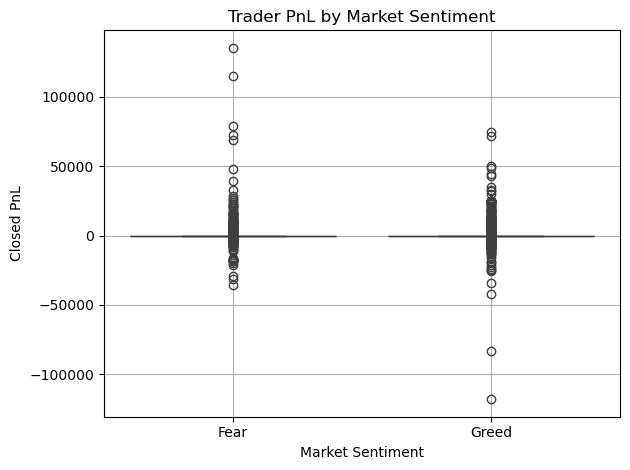

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load Data from your system ===
trader_df = pd.read_csv(r"C:\Users\HP\Desktop\CGS Assignment\historical_data.csv")
sentiment_df = pd.read_csv(r"C:\Users\HP\Desktop\CGS Assignment\fear_greed_index.csv")

# === Step 2: Clean and Prepare Trader Data ===
# Convert 'Timestamp IST' to datetime using correct format
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['Date'] = trader_df['Timestamp IST'].dt.normalize()  # drop time part

# === Step 3: Clean and Prepare Sentiment Data ===
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['Sentiment'] = sentiment_df['classification'].apply(lambda x: 'Fear' if 'Fear' in x else 'Greed')
sentiment_df['Sentiment'] = sentiment_df['Sentiment'].map({'Fear': 0, 'Greed': 1})

# === Step 4: Merge Datasets ===
merged_df = pd.merge(trader_df, sentiment_df[['date', 'Sentiment']], left_on='Date', right_on='date', how='inner')

# === Step 5: Add Win Column ===
merged_df['win'] = merged_df['Closed PnL'] > 0

# === Step 6: Summary Statistics ===
print("\n✅ Average Closed PnL by Sentiment:")
print(merged_df.groupby('Sentiment')['Closed PnL'].mean())

print("\n✅ Win Rate by Sentiment:")
print(pd.crosstab(merged_df['Sentiment'], merged_df['win'], normalize='index'))

# === Step 7: Visualization ===

# Boxplot of Closed PnL
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL')
plt.xticks([0, 1], ['Fear', 'Greed'])
plt.title("Trader PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Leverage histogram if you add a 'leverage' column later


In [16]:
print(trader_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date']


In [17]:
#Pattern 1: Average PnL by Trade Size and Sentiment

# Create trade size categories
merged_df['Size_Category'] = pd.qcut(merged_df['Size USD'], q=3, labels=['Small', 'Medium', 'Large'])

# Analyze PnL by Size and Sentiment
print(merged_df.groupby(['Sentiment', 'Size_Category'])['Closed PnL'].mean().unstack()) 


Size_Category     Small     Medium       Large
Sentiment                                     
0              1.433758   9.171576  124.947151
1              3.598996  15.528429  133.640612


C:\Users\HP\AppData\Local\Temp\ipykernel_13536\768034521.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(merged_df.groupby(['Sentiment', 'Size_Category'])['Closed PnL'].mean().unstack())


In [18]:
#Pattern 2: Win Rate by Buy/Sell Side and Sentiment

# Create win column if not done
merged_df['win'] = merged_df['Closed PnL'] > 0

# Win rate for Buy vs Sell on Fear vs Greed days
print(merged_df.groupby(['Sentiment', 'Side'])['win'].mean().unstack())


Side            BUY      SELL
Sentiment                    
0          0.246718  0.565855
1          0.292055  0.525686


In [21]:
# Pattern 3: Average PnL by Side and Sentiment

print(merged_df.groupby(['Sentiment', 'Side'])['Closed PnL'].mean().unstack())


Side             BUY       SELL
Sentiment                      
0          56.015456  42.542558
1          22.074041  72.199814


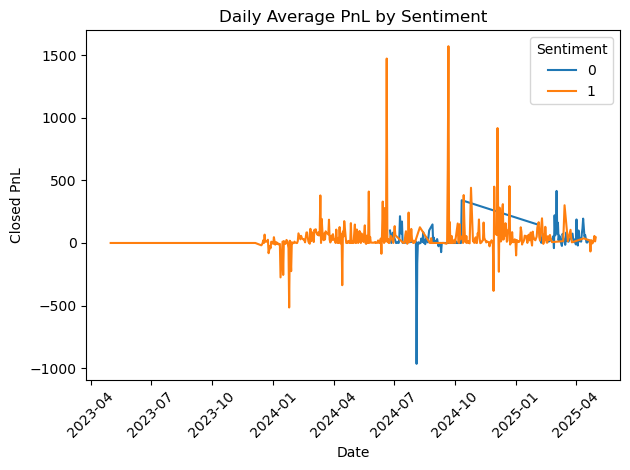

In [20]:
#Pattern 4: Daily PnL Trend

daily_pnl = merged_df.groupby(['Date', 'Sentiment'])['Closed PnL'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=daily_pnl, x='Date', y='Closed PnL', hue='Sentiment')
plt.title("Daily Average PnL by Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
